In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

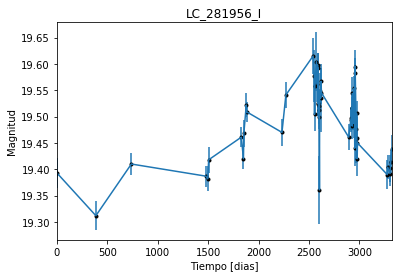

In [2]:
data = np.genfromtxt('LC_281956_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_281956_I')
plt.savefig("LC_281956_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

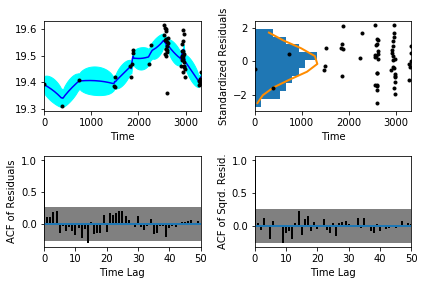

In [5]:
sample.assess_fit()

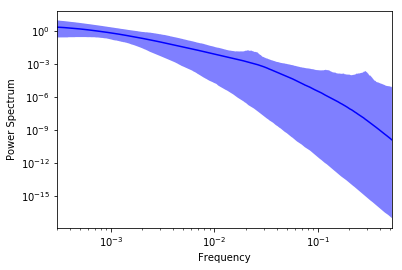

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

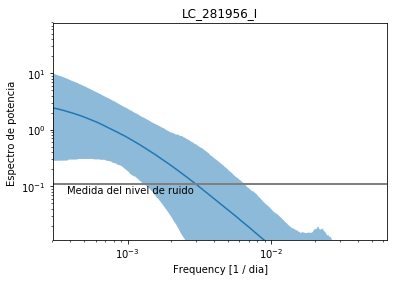

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_281956_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_281956_I')

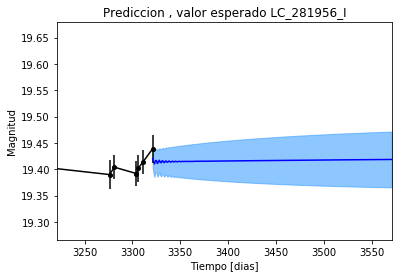

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_281956_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_281956_I')

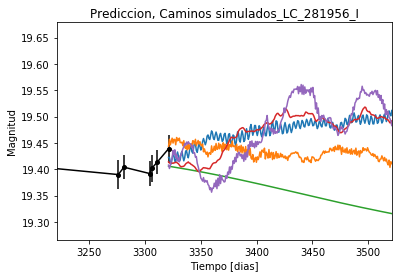

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_281956_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


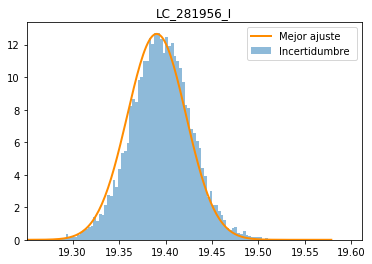

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_281956_I')
plt.savefig("Mejor_ajuste_LC_281956_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_281956_I')

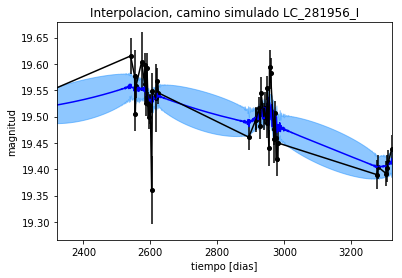

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_281956_I')

Text(0.5,1,'Interpolacion, camino simulado LC_281956_I')

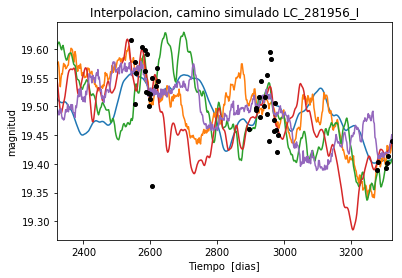

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_281956_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 961.346097061
Median: 0.0122063262685
Standard deviation: 0.194722281101
68% credibility interval: [ 0.00138805  0.18377119]
95% credibility interval: [  3.94097825e-04   7.71262565e-01]
99% credibility interval: [  3.15998616e-04   9.42990890e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 330.801264028
Median: 0.00537633894562
Standard deviation: 0.0975709147609
68% credibility interval: [ 0.00069063  0.0537945 ]
95% credibility interval: [ 0.00033065  0.3213814 ]
99% credibility interval: [  3.08773760e-04   6.57638905e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1031.90352796
Median: 0.064550616141
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 733.261814447
Median: 115.073453781
Standard deviation: 1.8134913777
68% credibility interval: [ 113.16347821  116.54867979]
95% credibility interval: [ 110.68712805  117.7234359 ]
99% credibility interval: [ 108.5904508  118.7206531]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 643.876040629
Median: 1.07287803133
Standard deviation: 2.32061204149
68% credibility interval: [ 0.16658721  4.5079789 ]
95% credibility interval: [ 0.03460125  7.93136548]
99% credibility interval: [  0.01494437  10.81921088]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 241.839687827
Median: 1.37004518079
Standard deviation: 10.3386864455
68% credibility interval: [  0.05719886  12.81331698]
95% credibility interval: [  5.96646049e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20016.0909575
Median: 4.5170037039e-56
Standard deviation: 1.38884779069e+39
68% credibility interval: [  3.27430504e-83   4.49802590e-16]
95% credibility interval: [  6.97562962e-102   2.92831383e+001]
99% credibility interval: [  2.70451240e-148   5.87913623e+031]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1353.28747613
Median: 19.437672909
Standard deviation: 0.0376113402216
68% credibility interval: [ 19.40282445  19.46966295]
95% credibility interval: [ 19.35739182  19.50592427]
99% credibility interval: [ 19.31727137  19.5502839 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 204.300908137
Median: 0.0527230132262
Standard deviation: 0.266472861636
68% credibility interval: [ 0.          0.47324036]
95% credibility interval: [ 0.          0.92066202]
99% credibility interval: [ 0.          1.01146517]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 204.300908137
Median: 0.0527230132262
Standard deviation: 0.266472861636
68% credibility interval: [ 0.          0.47324036]
95% credibility interval: [ 0.          0.92066202]
99% credibility interval: [ 0.          1.01146517]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1252.23815772
Median: 0.0
Standard deviation: 0.000593159854139
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 733.261814447
Median: 115.073453781
Standard deviation: 1.8134913777
68% credibility interval: [ 113.16347821  116.54867979]
95% credibility interval: [ 110.68712805  117.7234359 ]
99% credibility interval: [ 108.5904508  118.7206531]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 4112.45013431
Median: 0.00582096510254
Standard deviation: 0.00507041957643
68% credibility interval: [ 0.00360515  0.0101684 ]
95% credibility interval: [ 0.00234269  0.0185811 ]
99% credibility interval: [ 0.0018212   0.03062129]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1750.62789887
Median: 1.25409781583
Standard deviation: 0.222468491662
68% credibility interval: [ 1.05355731  1.50174017]
95% credibility interval: [ 0.89896407  1.76854178]
99% credibility interval: [ 0.8140744   1.90603147]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 590.046867462
Median: 0.00119959865715
Standard deviation: 0.128398650696
68% credibility interval: [  1.50978696e-05   3.03344617e-02]
95% credibility interval: [  4.87850883e-08   3.20502311e-01]
99% credibility interval: [  1.14937475e-36   8.63558742e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 961.346097061
Median: (-0.0766946098651-0.200576216868j)
Standard deviation: 2.07368487979
68% credibility interval: [-1.15466841-2.09208249j -0.00872135-0.16052189j]
95% credibility interval: [ -4.84598561e+00+0.j          -2.47618967e-03-0.00070024j]
99% credibility interval: [ -5.92498650e+00-4.0142376j   -1.98547786e-03-0.17062925j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 330.801264028
Median: (-0.0337805338695+0j)
Standard deviation: 1.78300669006
68% credibility interval: [-0.33800079+0.j        -0.00433937+0.0446532j]
95% credibility interval: [-2.01929888+1.5099006j -0.00207754+0.j       ]
99% credibility interval: [ -4.13206710e+00+1.58225896j  -1.94008275e-03+0.j        ]
Posterior summary for paramet